<a href="https://colab.research.google.com/github/ArasHEsLaM1/machine_learning_with_python_jadi/blob/main/gbpusdlast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import time
from keras.models import Sequential,load_model
from keras.layers  import Dropout,LSTM,Dense
from keras.callbacks import EarlyStopping
import yfinance as yf


In [1]:
%pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 28.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [282]:
basic_data= yf.download("GBPUSD=X",start='2010-01-13',end='2022-1-13')


[*********************100%***********************]  1 of 1 completed


In [124]:
basic_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-13,1.304376,1.304631,1.296193,1.304563,1.304563,0
2020-01-14,1.298771,1.301897,1.295673,1.298819,1.298819,0
2020-01-15,1.302253,1.304121,1.298921,1.302253,1.302253,0
2020-01-16,1.304121,1.308164,1.302898,1.304121,1.304121,0
2020-01-17,1.307788,1.311579,1.301778,1.307873,1.307873,0


In [125]:
basic_data.shape

(524, 6)

In [295]:
df=pd.DataFrame(basic_data)

In [296]:
df_close=df.reset_index()['Close']

In [297]:
df_close.shape


(3127,)

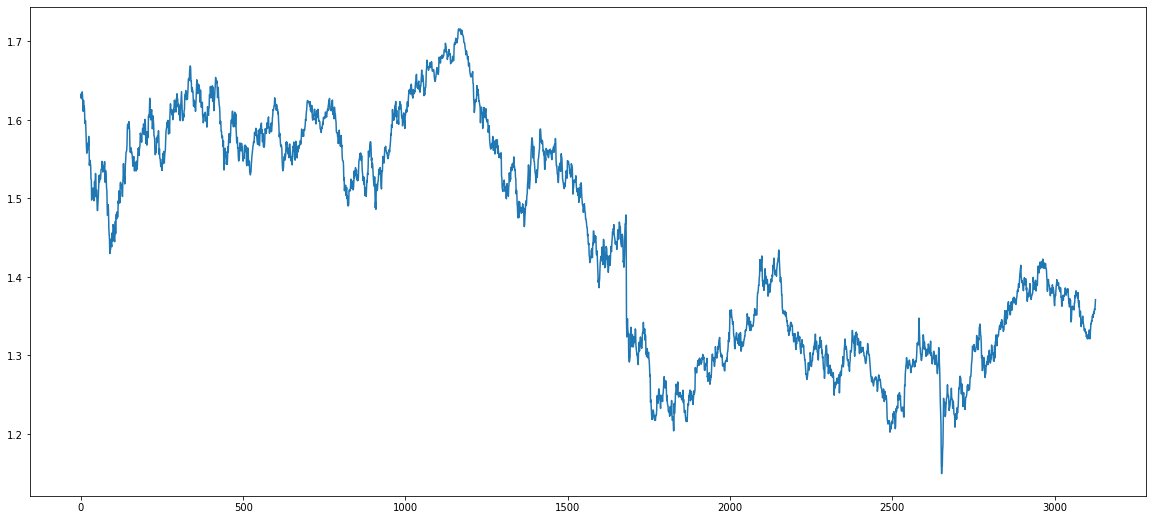

In [298]:
plt.figure(figsize=(20,9))
plt.plot(df_close)

In [300]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close.shape
df_close

array([[0.84562182],
       [0.85407216],
       [0.84276935],
       ...,
       [0.3681149 ],
       [0.37745955],
       [0.39100012]])

In [301]:
trainig_size=int(len(df_close)*0.8)
testing_size=len(df_close)-trainig_size
train_data,test_data=df_close[0:trainig_size,:],df_close[trainig_size:len(df_close),:1]
trainig_size,testing_size

(2501, 626)

In [302]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]    #i=0, 0,1,2,3,-----99,100
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return np.array(dataX),np.array(dataY)

In [303]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [304]:
x_train


array([[0.84562182, 0.85407216, 0.84276935, ..., 0.52211461, 0.53430058,
        0.55989837],
       [0.85407216, 0.84276935, 0.85741902, ..., 0.53430058, 0.55989837,
        0.55690263],
       [0.84276935, 0.85741902, 0.8580796 , ..., 0.55989837, 0.55690263,
        0.5540651 ],
       ...,
       [0.29265215, 0.27568078, 0.26973937, ..., 0.10312663, 0.10055501,
        0.09988749],
       [0.27568078, 0.26973937, 0.2778792 , ..., 0.10055501, 0.09988749,
        0.10539469],
       [0.26973937, 0.2778792 , 0.28823386, ..., 0.09988749, 0.10539469,
        0.11764314]])

In [305]:
x_train.shape
#(number of records,time_step)

(2400, 100)

In [ ]:
#CREATE A LSTM MODEL

In [306]:
#RESHAPE INPUT TO BE [samples,time steps,feature] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #last one for convert into 3D model
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [307]:
#CREAT LSTM MODEL CELL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #100 for time steps  LSTM LAYER 1
model.add(LSTM(50,return_sequences=True))                                         #LSTM LAYER 2
model.add(LSTM(50))                                                               #LSTM LAYER 3
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   #LOSS FUNCRION ALGORITHM=MSE , OPTIMIZER ALGORITHM =ADAM

In [308]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
38/38 [==============================] - 15s 241ms/step - loss: 0.0329 - val_loss: 0.0047
Epoch 2/200
38/38 [==============================] - 8s 203ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/200
38/38 [==============================] - 8s 206ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/200
38/38 [==============================] - 8s 200ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/200
38/38 [==============================] - 8s 202ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/200
38/38 [==============================] - 8s 203ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/200
38/38 [==============================] - 8s 203ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/200
38/38 [==============================] - 8s 202ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/200
38/38 [==============================] - 8s 204ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/200
38/38 [==============================] - 8s 203ms/step - loss: 0.0013 - val_l

In [309]:
#DO THE PREDICTION AND CHECK PERFORMANCE METRICS
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [310]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [311]:
#calculate the RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.015915572001234238

In [312]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.01628674667268174

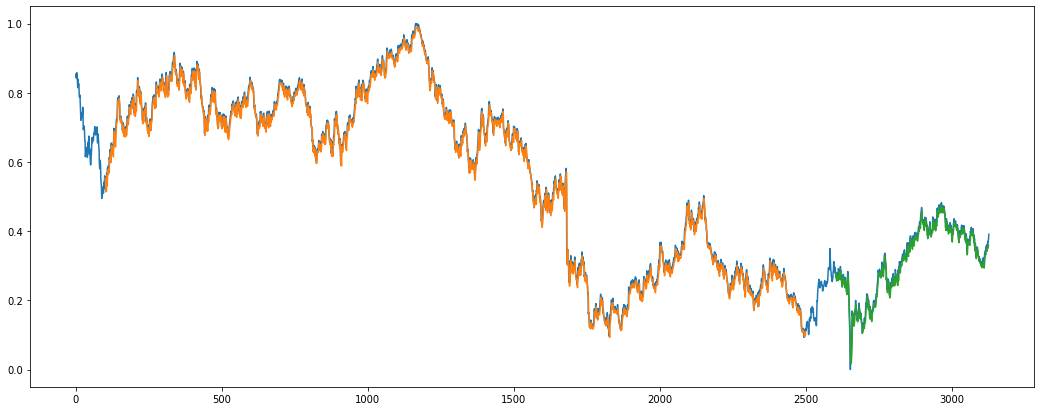

In [313]:
look_back=100
trainPredictplot = np.empty_like(df_close)
trainPredictplot[:, :]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,  :]=train_predict
testPredictionplot= np.empty_like(df_close)
testPredictionplot[:, :]= np.nan
testPredictionplot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :]=test_predict
plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictplot)
plt.plot(testPredictionplot)
plt.show()

In [314]:
len(test_data)

626

In [315]:
x_input=test_data[526:].reshape(1,-1)

In [316]:
x_input.shape

(1, 100)

In [317]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [318]:
temp_input #previous 100 days test data to feed the model

[0.389657295024338,
 0.40035380856470004,
 0.39990592032932915,
 0.39866007996772,
 0.40187902683921317,
 0.4133798037538461,
 0.41733948076941685,
 0.4138529369813466,
 0.403319043265288,
 0.4011763745582648,
 0.41388680734578775,
 0.41408960878256407,
 0.41361647555506353,
 0.4086924398401317,
 0.41551048108960753,
 0.40635559506864327,
 0.3944713046485706,
 0.38265328233283924,
 0.3817309986203612,
 0.3746091759655892,
 0.3932077927924702,
 0.38377373923353675,
 0.3895247588156563,
 0.3613965782096167,
 0.34095718070659853,
 0.34861672169373703,
 0.3664563057572465,
 0.37290892574564216,
 0.37647583275865903,
 0.3701997173402378,
 0.3751656176671183,
 0.3745111412461517,
 0.36993885242156255,
 0.3678544575713727,
 0.38380676809824,
 0.38374092074376787,
 0.40010640764182703,
 0.395669600275002,
 0.40568365752811975,
 0.41094282051357567,
 0.40533127951297354,
 0.40030689495432537,
 0.40060794148547396,
 0.4009087776416882,
 0.3950370028472143,
 0.4070107026144134,
 0.386282249951508

In [319]:
#demonstrate prediction for the next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
      x_input=np.array(temp_input[1:]) #SHIFT TO WRITE
      print("{}day input{}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print('{}day output {}'.format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
  else:                                             #FIRST ELSE RUN AFTER PREDICTION AND OUR DATAS BE MORE THAN 100 WE PASS TO IF
    x_input=x_input.reshape((1,n_steps,1))#FIRST OF ALL RESHAPE THE DATA #avalin ghadam reshape
    yhat=model.predict(x_input,verbose=0) #YHAT==PREDICTION            #pass the data to the model
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())# ADD YHAT TO THE PREVIOUS DATAS #ezafe kardan prediction be gheimate ghabli 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.381241]
101
1day input[0.40035381 0.39990592 0.39866008 0.40187903 0.4133798  0.41733948
 0.41385294 0.40331904 0.40117637 0.41388681 0.41408961 0.41361648
 0.40869244 0.41551048 0.4063556  0.3944713  0.38265328 0.381731
 0.37460918 0.39320779 0.38377374 0.38952476 0.36139658 0.34095718
 0.34861672 0.36645631 0.37290893 0.37647583 0.37019972 0.37516562
 0.37451114 0.36993885 0.36785446 0.38380677 0.38374092 0.40010641
 0.3956696  0.40568366 0.41094282 0.40533128 0.40030689 0.40060794
 0.40090878 0.395037   0.4070107  0.38628225 0.38136915 0.3746584
 0.38833277 0.35545959 0.35240116 0.36532554 0.36453032 0.33854166
 0.3303789  0.33930384 0.33777989 0.34063888 0.35246532 0.35387946
 0.34238941 0.33587789 0.33205117 0.32405839 0.32114554 0.32587877
 0.32130185 0.31792765 0.31511704 0.31864545 0.30758477 0.31235671
 0.30913208 0.30277055 0.30523678 0.31108415 0.30338674 0.30638248
 0.31213918 0.3228359  0.30619399 0.30276445 0.31328846 0.32782768
 0.33746285 0.33705346 0.34382354 0.3421

In [320]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)#30days

In [321]:
len(df_close)

3127

In [322]:
df3=df_close.tolist()
df3.extend(lst_output)
lst_output

[[0.38124099373817444],
 [0.3724841773509979],
 [0.36231768131256104],
 [0.35221394896507263],
 [0.3426896631717682],
 [0.333687424659729],
 [0.325001060962677],
 [0.31644439697265625],
 [0.3079127073287964],
 [0.29938003420829773],
 [0.29087111353874207],
 [0.28243255615234375],
 [0.2741117775440216],
 [0.26594606041908264],
 [0.2579585611820221],
 [0.2501598000526428],
 [0.24255059659481049],
 [0.23512627184391022],
 [0.22787900269031525],
 [0.2208009511232376],
 [0.2138848751783371],
 [0.20712508261203766],
 [0.20051784813404083],
 [0.19406110048294067],
 [0.18775412440299988],
 [0.18159747123718262],
 [0.17559264600276947],
 [0.1697419136762619],
 [0.164047971367836],
 [0.15851368010044098]]

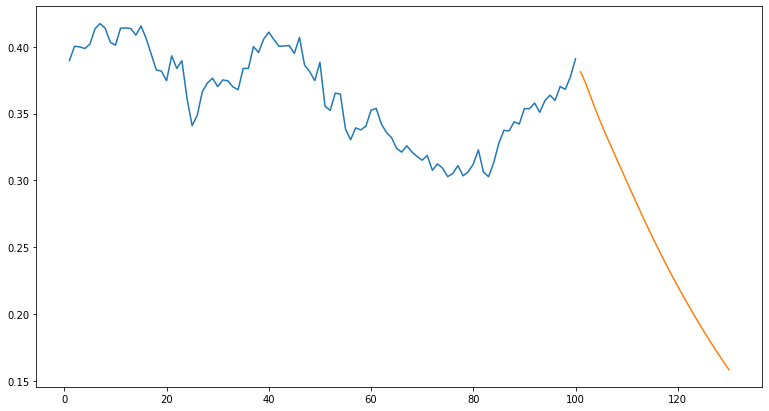

In [323]:
plt.figure(figsize=(13,7))
plt.plot(day_new,scaler.inverse_transform(df_close[3027:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

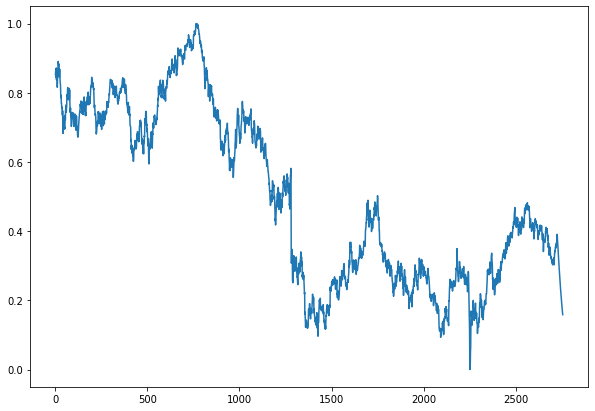

In [324]:
plt.figure(figsize=(10,7))
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])


[*********************100%***********************]  1 of 1 completed


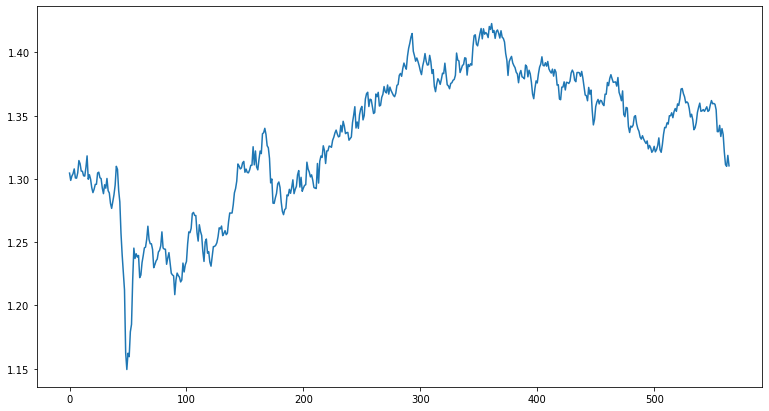

In [335]:
bb=yf.download("GBPUSD=X",start='2020-1-13',end='2022-3-12')
bb_close=bb.reset_index()['Close']
plt.figure(figsize=(13,7))
plt.plot(bb_close)